In [272]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [273]:
movie_df = pd.read_excel('IMDB Movies 2000 - 2020 (clean).xlsx', sheet_name='Clean Data').dropna()
movie_df = movie_df[movie_df['country'].str.contains("USA")]
movie_df = movie_df[pd.to_numeric(movie_df['usa_gross_income'], errors='coerce').notnull()]
movie_df = movie_df[pd.to_numeric(movie_df['budget'], errors='coerce').notnull()]
movie_df["Profit"] = movie_df["usa_gross_income"] - movie_df["budget"]
movie_df.head()

,original_title,year,genre,duration,country,language_1,director,actors,actors_1,actors_f2,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,reviews_from_users,Profit
0,Kate & Leopold,2001,"Comedy, Fantasy, Romance",118,USA,English,James Mangold,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",Meg Ryan,"Meg Ryan, Hugh Jackman",An English Duke from 1876 is inadvertedly drag...,6.4,77852,48000000,47121859.0,76019048,341.0,-878141.0
1,Glitter,2001,"Drama, Music, Romance",104,USA,English,Vondie Curtis-Hall,"Mariah Carey, Max Beesley, Da Brat, Tia Texada...",Mariah Carey,"Mariah Carey, Max Beesley",A young singer dates a disc jockey who helps h...,2.2,21298,22000000,4274407.0,5271666,319.0,-17725593.0
5,Chicken Run,2000,"Animation, Adventure, Comedy",84,"UK, USA, France",English,"Peter Lord, Nick Park","Phil Daniels, Lynn Ferguson, Mel Gibson, Tony ...",Phil Daniels,"Phil Daniels, Lynn Ferguson",When a cockerel apparently flies into a chicke...,7.0,173987,45000000,106834564.0,224834564,393.0,61834564.0
6,Fantastic Four,2005,"Action, Adventure, Fantasy",106,"USA, Germany",English,Tim Story,"Ioan Gruffudd, Jessica Alba, Chris Evans, Mich...",Ioan Gruffudd,"Ioan Gruffudd, Jessica Alba",A group of astronauts gain superpowers after a...,5.7,307944,100000000,154696080.0,333535934,1029.0,54696080.0
7,Frida,2002,"Biography, Drama, Romance",123,"Mexico, USA, Canada",English,Julie Taymor,"Salma Hayek, M√≠a Maestro, Amelia Zapata, Alej...",Salma Hayek,"Salma Hayek, M√≠a Maestro","A biography of artist Frida Kahlo, who channel...",7.4,79690,12000000,25885000.0,56298474,297.0,13885000.0


In [274]:
genre_df = movie_df[{"original_title", "year", "genre", "Profit"}].copy()
genre_df.head()

/var/folders/n3/0fjc3g9d04gb6vgxphygsqj80000gn/T/ipykernel_27852/1115506969.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  genre_df = movie_df[{"original_title", "year", "genre", "Profit"}].copy()


,genre,original_title,Profit,year
0,"Comedy, Fantasy, Romance",Kate & Leopold,-878141.0,2001
1,"Drama, Music, Romance",Glitter,-17725593.0,2001
5,"Animation, Adventure, Comedy",Chicken Run,61834564.0,2000
6,"Action, Adventure, Fantasy",Fantastic Four,54696080.0,2005
7,"Biography, Drama, Romance",Frida,13885000.0,2002


In [275]:
def find_genre_profit(df, genre):
    temp_df = df[df['genre'].str.contains(genre)]
    profit = temp_df.groupby("year").agg({"Profit": "mean"})["Profit"]
    return profit.values

def find_genre_count(df, genre):
    temp_df = df[df['genre'].str.contains(genre)]
    count = temp_df.groupby("year").agg({"Profit": "count"})["Profit"]
    return count.values

genres = ["Animation", "Action", "Biography", "Crime", "Adventure", "Mystery", "Music", "Fantasy", "Romance", "Family", "Thriller", "Sci-Fi", "Music", "Drama", "Horror", "Comedy", "History"]

In [276]:
genres = ["Animation", "Action", "Biography", "Crime", "Adventure", "Mystery", "Music", "Fantasy", "Romance", "Family", "Thriller", "Sci-Fi", "Music", "Drama", "Horror", "Comedy", "History"]
genre_profit_df = pd.DataFrame({"year": range(2000, 2021)})
for genre in genres:
    genre_profit = find_genre_profit(genre_df, genre)
    if(len(genre_profit)==21):
        genre_profit_df[f"Profit in {genre}"] = genre_profit
    
genre_profit_df


,year,Profit in Action,Profit in Crime,Profit in Adventure,Profit in Mystery,Profit in Fantasy,Profit in Family,Profit in Thriller,Profit in Sci-Fi,Profit in Drama,Profit in Horror,Profit in Comedy
0,2000,7.821798e+06,2.529328e+06,1.419295e+07,4.012249e+06,2.020202e+07,2.305213e+07,-3.095999e+05,-6.516206e+06,3.337580e+06,9.557876e+05,1.465581e+07
1,2001,1.221552e+07,4.658582e+06,4.548881e+07,8.291973e+04,2.528165e+07,8.791875e+07,1.080067e+07,1.459124e+06,3.465008e+06,1.147777e+07,1.458757e+07
2,2002,1.666649e+07,-1.318047e+06,4.620633e+07,7.574413e+06,4.239225e+07,3.797313e+07,5.797160e+06,2.403986e+07,1.265920e+07,7.425929e+06,1.688708e+07
3,2003,1.394647e+07,3.830381e+06,1.655962e+07,8.210213e+06,3.488041e+07,2.871032e+07,7.008800e+06,4.618131e+06,5.817348e+06,1.611776e+07,1.982246e+07
4,2004,3.715051e+06,-3.170423e+06,2.352420e+07,1.094653e+07,-8.901301e+05,1.618427e+07,2.342804e+07,2.072001e+07,5.913943e+06,8.655844e+06,8.945096e+06
5,2005,-1.192822e+07,-1.587607e+06,1.033680e+07,1.141854e+07,3.337343e+07,2.351823e+07,4.722771e+06,-1.637077e+07,1.470144e+06,6.837972e+06,1.196714e+07
6,2006,-1.884813e+06,-3.605299e+06,5.040077e+06,-2.023794e+06,1.533789e+07,2.846872e+07,-2.991590e+06,-1.122388e+07,3.533637e+05,1.384845e+07,1.409781e+07
7,2007,1.364269e+07,-1.069068e+06,1.976010e+07,2.019437e+07,-9.878386e+06,7.537041e+06,4.206279e+06,1.793318e+07,8.098459e+05,7.622003e+06,1.524822e+07
8,2008,1.326810e+07,1.140588e+07,3.460406e+06,3.517109e+06,8.715346e+06,5.678565e+06,9.099624e+05,2.948929e+06,9.683127e+06,1.143477e+07,8.269571e+06
9,2009,1.824220e+07,-1.063765e+06,3.810314e+07,9.416140e+06,5.834708e+07,1.103682e+07,6.598398e+06,1.482512e+07,7.609278e+06,9.071169e+06,1.487647e+07


In [277]:
genre_count_df = pd.DataFrame({"year": range(2000, 2021)})
for genre in genres:
    genre_count = find_genre_count(genre_df, genre)
    if(len(genre_count)==21):
        genre_count_df[f"Count of {genre}"] = genre_count
    
genre_count_df

,year,Count of Action,Count of Crime,Count of Adventure,Count of Mystery,Count of Fantasy,Count of Family,Count of Thriller,Count of Sci-Fi,Count of Drama,Count of Horror,Count of Comedy
0,2000,32,28,29,11,14,7,24,12,66,14,55
1,2001,36,36,22,22,13,4,22,12,66,9,62
2,2002,41,36,30,17,11,11,28,9,79,14,65
3,2003,44,30,31,9,13,12,24,9,59,14,64
4,2004,41,27,27,19,11,16,17,12,66,13,75
5,2005,42,33,39,16,13,17,21,10,87,24,74
6,2006,36,30,39,18,20,14,29,10,88,18,76
7,2007,33,40,26,20,22,18,40,8,90,23,63
8,2008,51,31,37,16,18,11,27,11,88,14,72
9,2009,46,26,33,21,14,16,26,14,77,21,70


Text(0, 0.5, 'Profit (e8)')

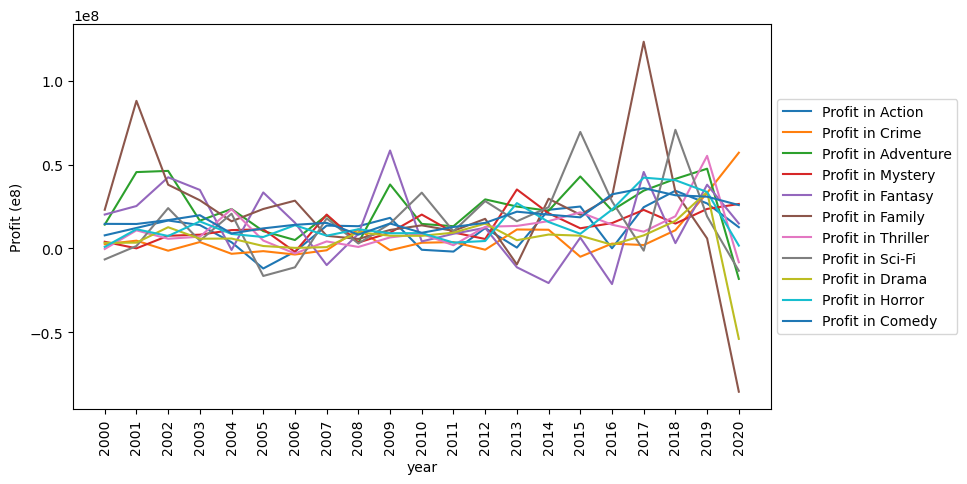

In [278]:
profit_cols = list(genre_profit_df.loc[:, genre_profit_df.columns != 'year'])
ax1 = genre_profit_df.plot.line(x="year", y=profit_cols, figsize=(9,5))
ax1.set_xticks(genre_profit_df["year"].values);
ax1.set_xticklabels(genre_profit_df["year"].values, rotation=90)
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax1.set_ylabel('Profit (e8)')

Text(0, 0.5, 'Movie Count')

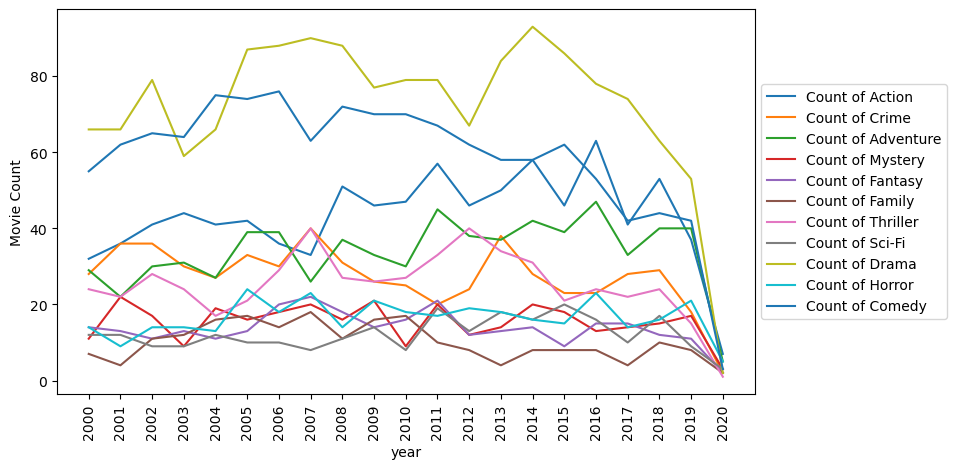

In [279]:
count_cols = list(genre_count_df.loc[:, genre_count_df.columns != 'year'])
ax1 = genre_count_df.plot.line(x="year", y=count_cols, figsize=(9,5))
ax1.set_xticks(genre_count_df["year"].values);
ax1.set_xticklabels(genre_count_df["year"].values, rotation=90)
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax1.set_ylabel('Movie Count')